In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.layers import Activation
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,Lambda
from sklearn.metrics import plot_confusion_matrix
from keras.models import load_model
import visualkeras as vk 
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from keras.layers.advanced_activations import LeakyReLU


In [2]:
model = Sequential()

# conv 1
model.add(Conv2D(128,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv 2
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(62, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 activation (Activation)     (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 11, 11, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

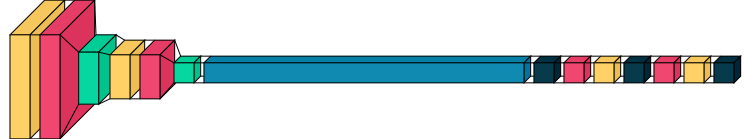

In [5]:
vk.layered_view(model)

In [6]:
traindata=pd.read_csv('emnist-byclass-train.csv')

In [7]:
testdata=pd.read_csv('emnist-byclass-test.csv')

In [8]:
def rev90(img):
    img=img.reshape(28,28)
    imgg=cv2.flip(img,0)
    imgg = cv2.rotate(imgg, cv2.ROTATE_90_CLOCKWISE)
    return imgg

In [9]:
def translate(pred):
    keywords={0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"A",11:"B",12:"C",13:"D",14:"E",15:"F",16:"G",17:"H",18:"I",19:"J",20:"K",21:"L",22:"M",23:"N",24:"O",25:"P",26:"Q",27:"R",28:"S",29:"T",30:"U",31:"V",32:"W",33:"X",34:"Y",35:"Z",36:"a",37:"b",38:"c",39:"d",40:"e",41:"f",42:"g",43:"h",44:"i",45:"j",46:"k",47:"l",48:"m",49:"n",50:"o",51:"p",52:"q",53:"r",54:"s",55:"t",56:"u",57:"v",58:"w",59:"x",60:"y",61:"z",  }
    return keywords[pred]

In [10]:
X=np.array(traindata.iloc[:,1:])
Y=np.array(traindata.iloc[:,0])

In [11]:
x=np.array(testdata.iloc[:,1:])
y=np.array(testdata.iloc[:,0])

In [15]:
for i in range(116322):
    img=x[i]
    img=rev90(img)
    img=img.reshape(784,)
    x[i]=img

In [16]:
for i in range(697931):
    img=X[i]
    img=rev90(img)
    img=img.reshape(784,)
    X[i]=img

In [18]:
X = X.reshape(X.shape[0],28,28,1)
x=x.reshape(x.shape[0],28,28,1)

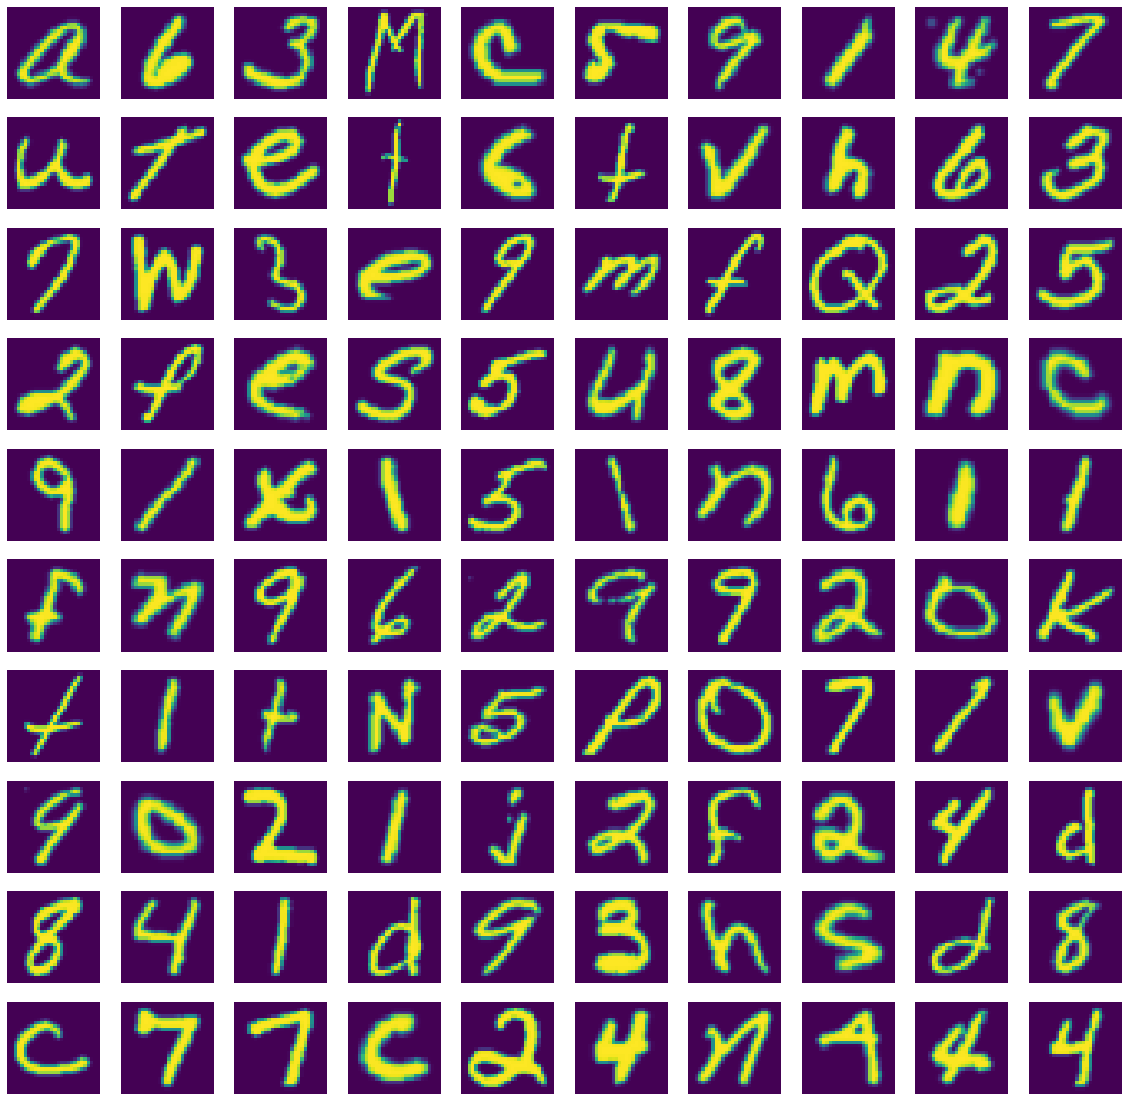

In [24]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X[i])
    plt.axis('off')

plt.show()

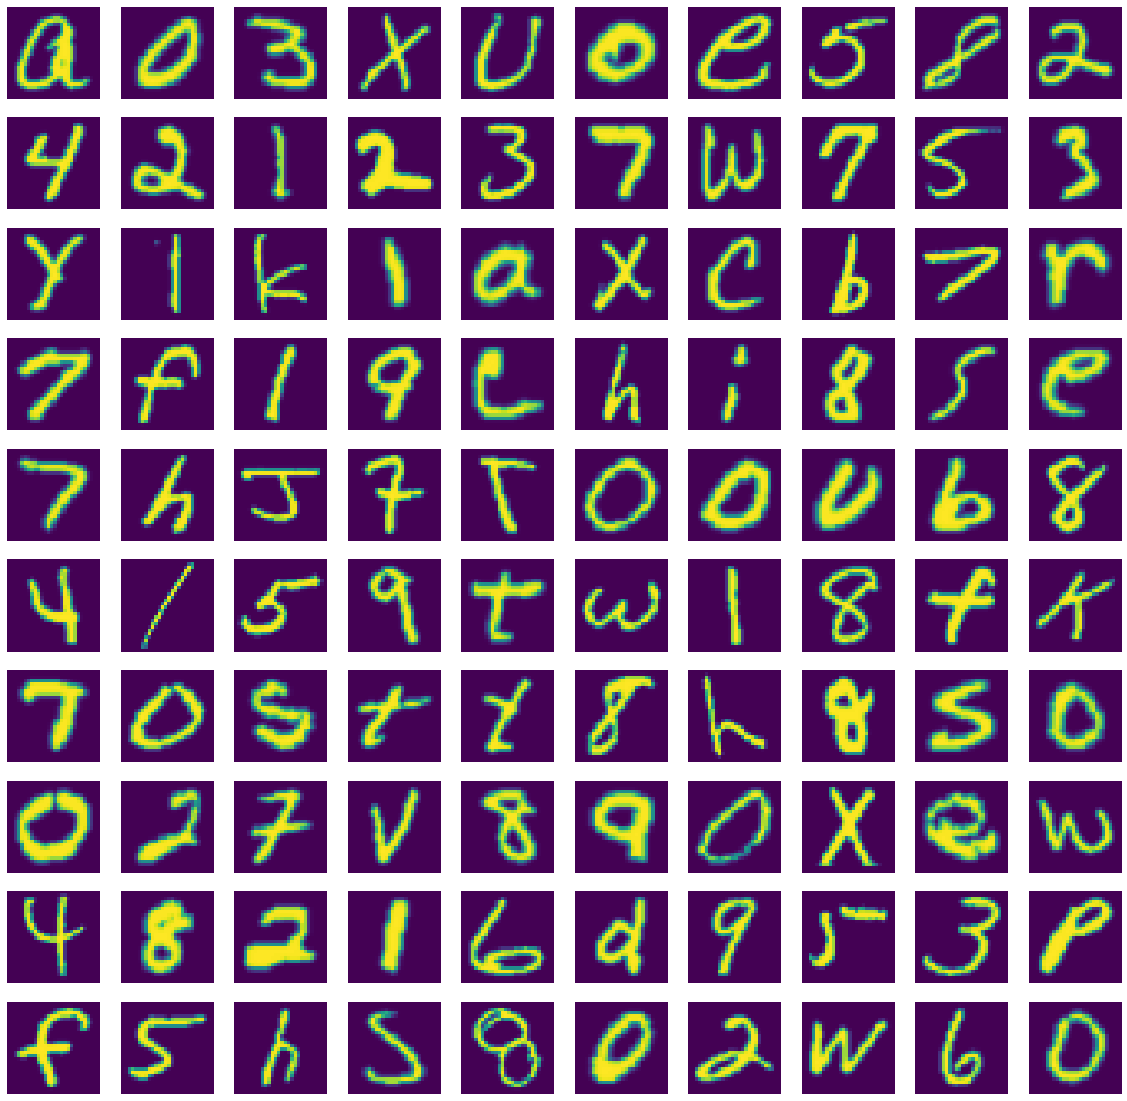

In [25]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x[i])
    plt.axis('off')

plt.show()

In [22]:
Y = Y.reshape(Y.shape[0],1)
y = y.reshape(y.shape[0],1)

In [23]:
X=X/255
x=x/255

In [33]:
X.shape

(697931, 28, 28, 1)

In [31]:
Y = to_categorical(Y,num_classes=62, dtype='float32')
y = to_categorical(y,num_classes=62, dtype='float32')

In [54]:
training=model.fit(X,Y,epochs=5,validation_data=(x,y))

Epoch 1/5
21811/21811 [==============================] - 676s 31ms/step - loss: 0.3797 - accuracy: 0.8628 - val_loss: 0.3738 - val_accuracy: 0.8654
Epoch 2/5
21811/21811 [==============================] - 692s 32ms/step - loss: 0.3783 - accuracy: 0.8629 - val_loss: 0.3765 - val_accuracy: 0.8647
Epoch 3/5
21811/21811 [==============================] - 679s 31ms/step - loss: 0.3788 - accuracy: 0.8629 - val_loss: 0.3892 - val_accuracy: 0.8619
Epoch 4/5
21811/21811 [==============================] - 656s 30ms/step - loss: 0.3772 - accuracy: 0.8635 - val_loss: 0.3824 - val_accuracy: 0.8622
Epoch 5/5
21811/21811 [==============================] - 678s 31ms/step - loss: 0.3774 - accuracy: 0.8637 - val_loss: 0.3771 - val_accuracy: 0.8647


In [83]:
predict=model2.predict(x)

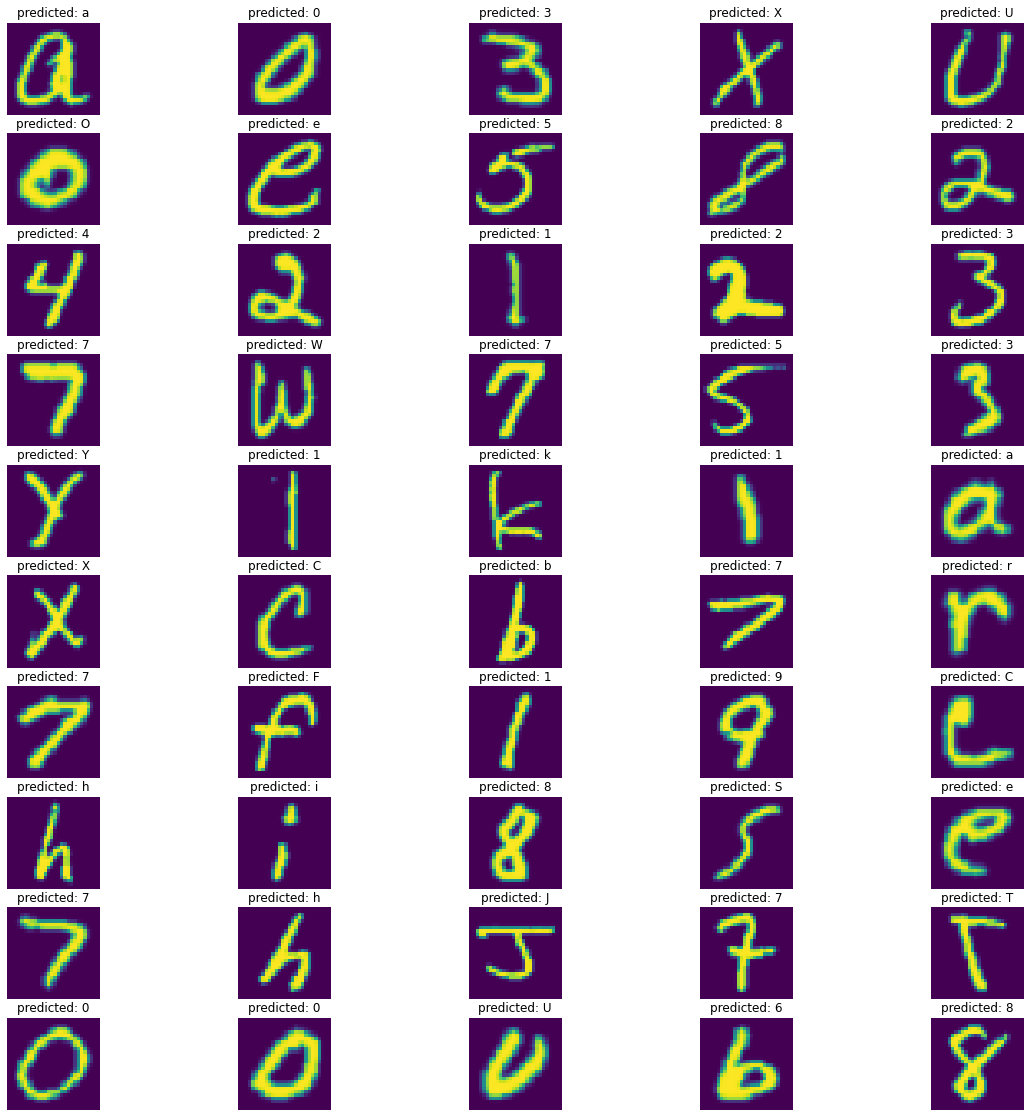

In [84]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(x[i])
    prediction = predict[i].argmax()
    final=translate(prediction)
    plt.title("predicted: {}".format(final))
    plt.axis('off')

plt.show()

In [3]:
imglist=[]

In [4]:
im=cv2.imread('C:/Users/ACH/Desktop/P/img/1.png')

In [8]:
imglist[0].shape

(28, 28, 1)

In [6]:
for i in range(45):
    im=cv2.imread('C:/Users/ACH/Desktop/P/img/{}.png'.format(i))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = im.reshape(28,28,1)
    imglist.append(im)

In [9]:
imglist[0].shape

(28, 28, 1)

In [7]:
imglist=np.array(imglist)

In [119]:
imglist=imglist/255

In [120]:
predict=model2.predict(imglist)

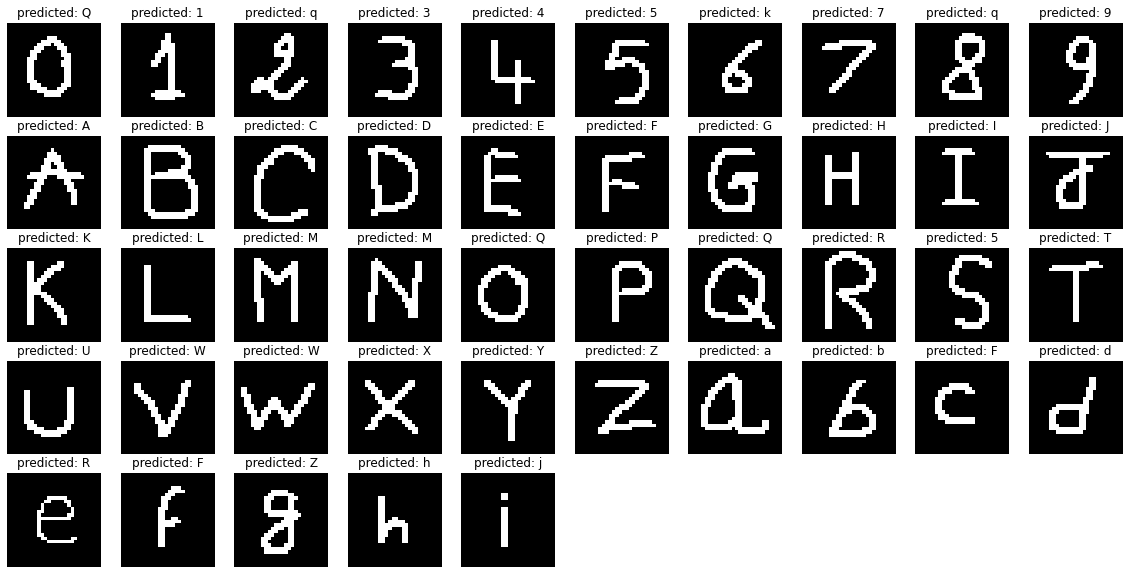

In [49]:
plt.figure(figsize=(20,10))
for i in range(len(imglist)):
    plt.subplot(5,10,i+1)
    plt.imshow(imglist[i], cmap='gray')
    pred = predict[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()

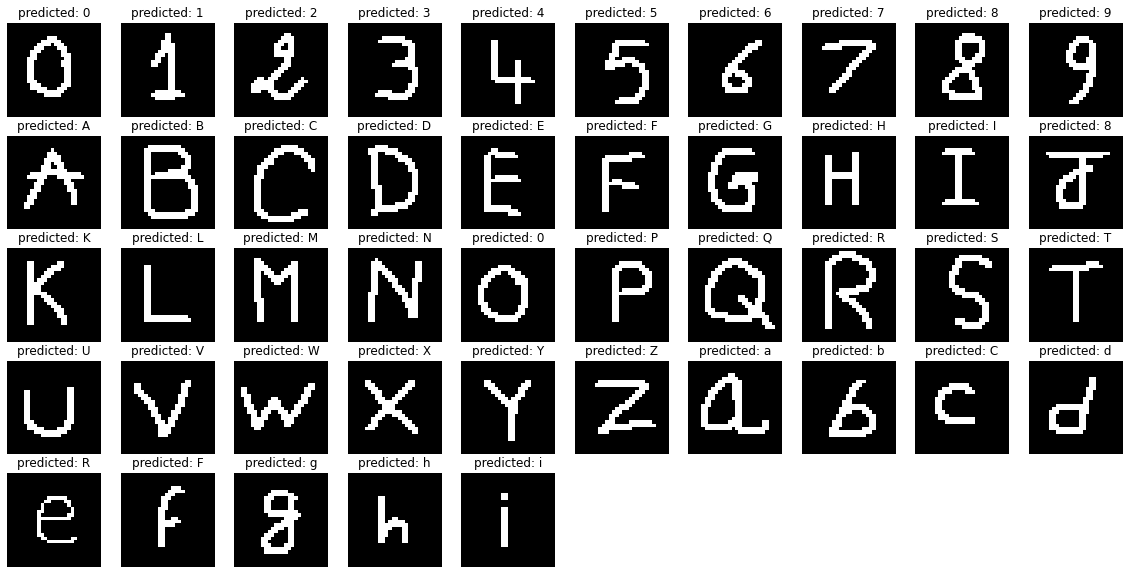

In [86]:
plt.figure(figsize=(20,10))
for i in range(len(imglist)):
    plt.subplot(5,10,i+1)
    plt.imshow(imglist[i], cmap='gray')
    pred = predict[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()

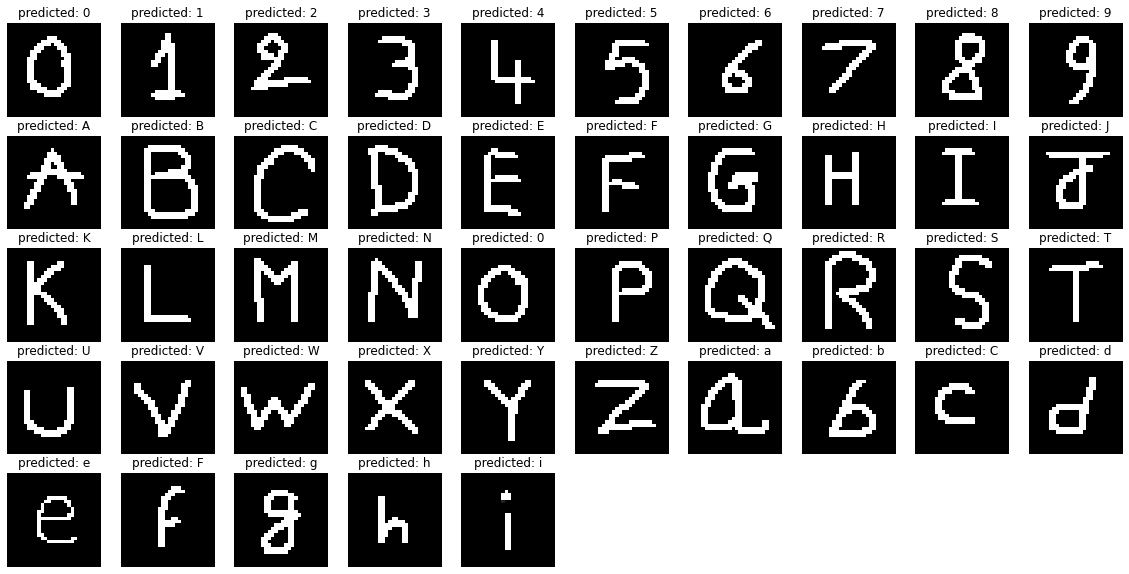

In [121]:
plt.figure(figsize=(20,10))
for i in range(len(imglist)):
    plt.subplot(5,10,i+1)
    plt.imshow(imglist[i], cmap='gray')
    pred = predict[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()

In [50]:
model.save('models/model1_85-84.h5')
json_model = model.to_json()
with open('models/model1_85-84.json', 'w') as json_file:
    json_file.write(json_model)
    
model.save_weights('models/model1_85-84_weights.h5')

In [81]:
model2= Sequential()
model2.add(Convolution2D(32,(3,3),padding='valid',input_shape=(28,28,1),activation='relu'))
model2.add(Convolution2D(32,(3,3),activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(62, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
training=model2.fit(X,Y,epochs=5,validation_data=(x,y))

Epoch 1/5
21811/21811 [==============================] - 569s 26ms/step - loss: 0.3984 - accuracy: 0.8577 - val_loss: 0.3722 - val_accuracy: 0.8672
Epoch 2/5
21811/21811 [==============================] - 564s 26ms/step - loss: 0.3969 - accuracy: 0.8577 - val_loss: 0.3727 - val_accuracy: 0.8634
Epoch 3/5
21811/21811 [==============================] - 564s 26ms/step - loss: 0.3946 - accuracy: 0.8588 - val_loss: 0.3676 - val_accuracy: 0.8641
Epoch 4/5
21811/21811 [==============================] - 567s 26ms/step - loss: 0.3948 - accuracy: 0.8589 - val_loss: 0.3648 - val_accuracy: 0.8685
Epoch 5/5
21811/21811 [==============================] - 568s 26ms/step - loss: 0.3937 - accuracy: 0.8594 - val_loss: 0.3697 - val_accuracy: 0.8684


In [122]:
model2.save('models/model2/model1_85-94.h5')

In [7]:
model2=load_model('models/model2/model1_85-94.h5')

In [8]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               2359808   
                                                      

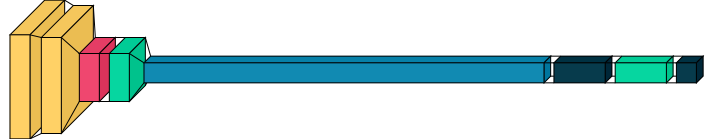

In [9]:
vk.layered_view(model2)